In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [13]:
def create_featureset(ls_train,ls_test,data_label,class_label):
    import numpy as np
    train_x=[]
    train_y=[]
    i=0
    while i<len(ls_train):
        contents = unpickle(ls_train[i])
        train_x=train_x+list(contents[data_label])
        train_y=train_y+list(contents[class_label])
        i+=1
        
    Vectorized_y = []  
    i=0
    while i<len(train_y):
        current_y = [0]*10
        current_y[train_y[i]]=1
        Vectorized_y.append(np.array(current_y))
        i+=1
    train_y = Vectorized_y
    
    test_x=[]
    test_y=[]
    i=0
    while i<len(ls_test):
        contents = unpickle(ls_train[i])
        test_x=test_x+list(contents[data_label])
        test_y=test_y+list(contents[class_label])
        i+=1
    
    Vectorized_y = []  
    i=0
    while i<len(test_y):
        current_y = [0]*10
        current_y[test_y[i]]=1
        Vectorized_y.append(np.array(current_y))
        i+=1
    test_y = Vectorized_y
    
    return train_x, train_y, test_x, test_y
        

In [14]:
def pickle_data(train_x, train_y, test_x, test_y,Name):
    import pickle
    final_list = {'train_x':train_x, 'train_y':train_y, 'test_x':test_x, 'test_y':test_y}
    with open(Name,'wb') as f:
        pickle.dump(final_list,f)

In [3]:
data = unpickle("cifar-10/test_batch")

In [9]:
data[b'labels']

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 5,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 2,
 4,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 0,
 3,
 8,
 8,
 7,
 7,
 4,
 6,
 7,
 3,
 6,
 3,
 6,
 2,
 1,
 2,
 3,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 5,
 2,
 7,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 6,
 2,
 1,
 3,
 0,
 4,
 2,
 7,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 5,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 9,
 6,
 5,
 6,
 3,
 8,
 7,
 6,
 2,
 5,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 4,
 5,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 3,
 8,
 6,
 3,
 4,
 0,
 5,
 8,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 4,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 6,
 9,
 4,
 3,
 9,
 6,
 4,
 7,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 5,
 5,
 1,
 1,
 8,
 9,
 0,
 3,
 1,
 9,
 2,
 2,


#### Raw dataset file names:

In [15]:
ls_train = ["cifar-10/data_batch_1","cifar-10/data_batch_2","cifar-10/data_batch_3","cifar-10/data_batch_4","cifar-10/data_batch_5"]
ls_test = ["cifar-10/test_batch"]
data_label = b'data'
class_label = b'labels'

#### final featureset for training


In [16]:
train_x, train_y, test_x, test_y = create_featureset(ls_train,ls_test,data_label,class_label)
pickle_data(train_x, train_y, test_x, test_y,'cifar-10.dataset')

### Unpickel FinalSet

In [17]:
data = unpickle("cifar-10.dataset")

In [31]:
train_x = data['train_x']
train_y = data['train_y']
test_x = np.array(data['test_x'])
test_y = np.array(data['test_y'])

In [32]:
import numpy as np
train_xR=[]
train_xG=[]
train_xB=[]
i=0
while i<len(train_x):
    train_xR.append(train_x[i][0:1024])
    train_xG.append(train_x[i][1024:2048])
    train_xB.append(train_x[i][2048:3072])
    i+=1
test_xR=[]
test_xG=[]
test_xB=[]
i=0
while i<len(test_x):
    test_xR.append(test_x[i][0:1024])
    test_xG.append(test_x[i][1024:2048])
    test_xB.append(test_x[i][2048:3072])
    i+=1
    
train_xR = np.array(train_xR)
train_xG = np.array(train_xG)
train_xB = np.array(train_xB)
test_xR = np.array(test_xR)
test_xG = np.array(test_xG)
test_xB = np.array(test_xB)

### Gray Scale Images

In [43]:
Gray_Train = np.array(0.2989 * train_xR + 0.5870 * train_xG + 0.1140 * train_xB,'int')
Gray_Test = np.array(0.2989 * test_xR + 0.5870 * test_xG + 0.1140 * test_xB,'int')

In [44]:
pickle_data(Gray_Train, train_y, Gray_Test, test_y,'cifar-10.gray.dataset')

### Plot Images

In [ ]:
def plot_image_and_print_class(x,y):
    import numpy as np
    import matplotlib.pyplot as plt
    image=[]
    i=0
    while i<32:
        row=[]
        j=0
        while j<32:
            cell=[]
            k=0
            while k<3:
                cell.append(np.array(x[k*1024+i*32+j]))
                k+=1
            j+=1
            row.append(np.array(cell))
        i+=1
        image.append(np.array(row))
    

    plt.figure(figsize=(1.2, 1.2))
    plt.imshow(np.array(image))
    
    plt.show()
    print("class",y)

### Classwise Distribution

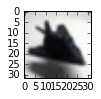

class 0


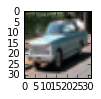

class 1


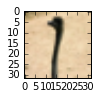

class 2


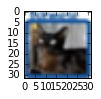

class 3


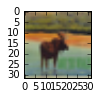

class 4


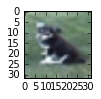

class 5


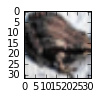

class 6


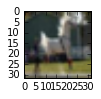

class 7


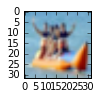

class 8


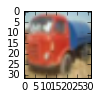

class 9


In [26]:
import numpy as np
i=0
j=0
while i<10:
    if np.argmax(train_y[j])==i:
        plot_image_and_print_class(train_x[j],i)
        i+=1
    j+=1

### grey scale

In [52]:
def plot_gray_image_and_print_class(x,y):
    import numpy as np
    import matplotlib.pyplot as plt
    image=[]
    i=0
    while i<32:
        row=[]
        j=0
        while j<32:
            cell=[]
            k=0
            while k<3:
                cell.append(np.array(x[i*32+j]))
                k+=1
            j+=1
            row.append(np.array(cell))
        i+=1
        image.append(np.array(row))
    

    plt.figure(figsize=(1.2, 1.2))
    plt.imshow(np.array(image))
    
    plt.show()
    print("class",y)

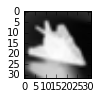

class 0


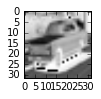

class 1


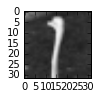

class 2


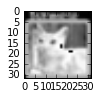

class 3


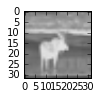

class 4


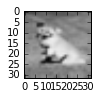

class 5


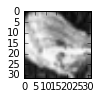

class 6


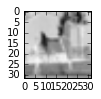

class 7


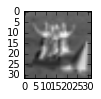

class 8


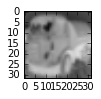

class 9


In [56]:
import numpy as np
i=0
j=0
while i<10:
    if np.argmax(train_y[j])==i:
        plot_gray_image_and_print_class(Gray_Train[j],i)
        i+=1
    j+=1